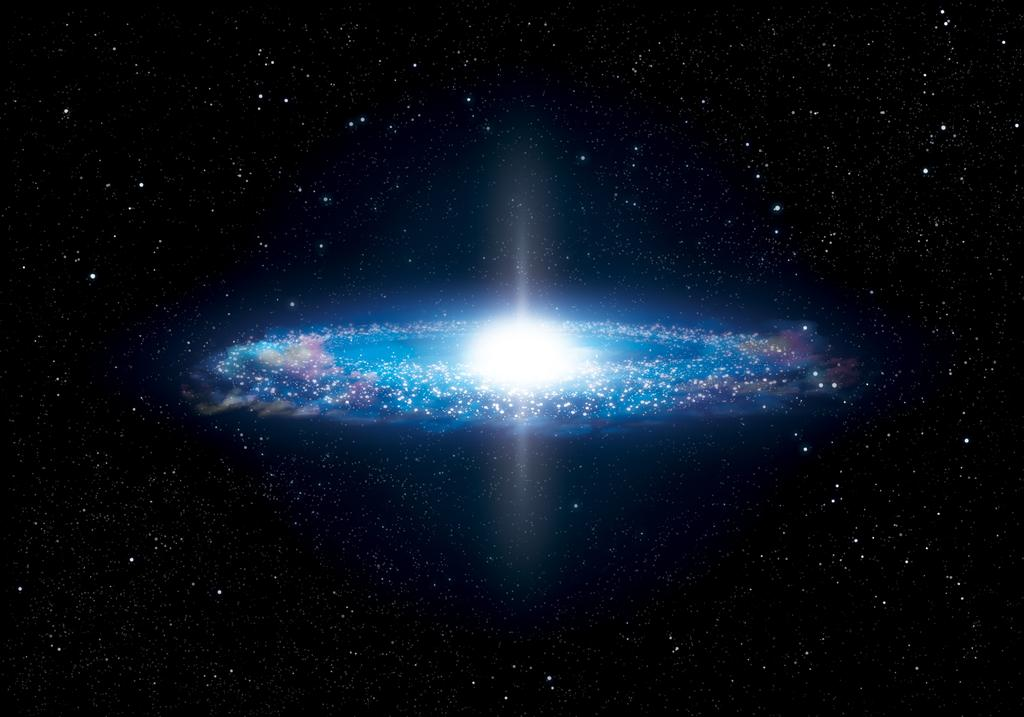

# ★ A Dive into UFO Sightings ★

When I first became aware of this assignment, I thought of so many different topics I would like to look into. And I ALMOST had decided on the correlation between seismic activity on Earth and solar activity or lunar connections to seismic activity. <br>

I became a little disappointed with my topic when I realized that the datasets for it were going to make the work incredibly rough. And then it occurred to me! UFO sightings!! <br>

As someone who has been interested in the unexplained since as early as I can remember, it was a bit of a no-brainer! Not to mention, I found a great dataset with over 80,000 entries for sightings over many decades. So here we go! Let's look into UFO sightings and see if we can come up with some new and interesting connections from, as far as I can find, the world's most exhaustive collection of data on the subject!

### ⭒ Downloading the dataset ⭒
I am using the Jovian library's opendatasets function to import the data for my project and saving the data directly to this Jupyter notebook.

This dataset came from Kaggle. The direct link to the dataset is: https://www.kaggle.com/datasets/NUFORC/ufo-sightings/download?datasetVersionNumber=2

## ☆ About the Data ☆  

This dataset comes from a compilation of sightings reported to NUFORC, the National UFO Reporting Center, which has been taking and compiling reports of UFO sightings for many decades. The data contains over 80,000 reported UFO encounters from all over the world and includes the date, time, location, duration, and comments and descriptions from those reporting the encounters. <br>

<b> https://nuforc.org/ </b><br>

Here is further information about NUFORC from the "about us" section of their site (but do visit the link above if you are interested in learning more.

<i>National UFO Reporting Center - Information and Policies
The National UFO Reporting Center was founded in 1974 by noted UFO investigator Robert J. Gribble. The Center’s primary function over the past four decades has been to receive, record, and to the greatest degree possible, corroborate and document reports from individuals who have been witness to unusual, possibly UFO-related events.  Throughout its history, the Center has processed over 150,000 reports, and has distributed its information to thousands of individuals.<br> </i>

<i>The principal means used by the Center to receive sighting reports is this website, which has operated continuously since 1994.   Prior to that period, the telephone hotline and the U.S. mail were the primary means of taking reports. </i> 
<br>

<font color='red'><b>NOTE:</b> </font>Due to the nature of my data, such that much of it is not numeric, many of my calculations will be using lengths of the number of rows with the specific data being considered at any given moment. I will attempt to also utilize as many of functions created for working with numeric values, such as .sum() and .mean(), to exhibit their use as much as possible as well.







In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/NUFORC/ufo-sightings/download?datasetVersionNumber=2' 


In [3]:
import opendatasets as od
od.download(dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: evanmariecarr
Your Kaggle Key: ········


100%|██████████| 10.2M/10.2M [00:00<00:00, 72.6MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './ufo-sightings'

In [5]:
import os
os.listdir(data_dir)

['scrubbed.csv', 'complete.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "UFOs! This will be FUN!"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit('./img')
                     

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/ufos-this-will-be-fun" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/evanmarie/ufos-this-will-be-fun


'https://jovian.ai/evanmarie/ufos-this-will-be-fun'

In [10]:
jovian.commit(project= "UFOs! This will be FUN!")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/ufos-this-will-be-fun" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/evanmarie/ufos-this-will-be-fun


'https://jovian.ai/evanmarie/ufos-this-will-be-fun'

In [11]:
# Importing all my friends
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy


In [12]:

ufo_sightings_raw_df = pd.read_csv("./ufo-sightings/scrubbed.csv", low_memory=False)


### ➢ Creating a backup of the original dataset after import
This function exists so that as I work with my data, if I get to a point where I need to reset back to the cleaned and prepared data without having to clear all the outputs, etc, I can do so quickly and easily. All of the steps performed here are thoroughly explained in a walk-through format below.

In [13]:
ufo_sightings_backup = deepcopy(ufo_sightings_raw_df)

def init(): 
    ufo_sightings_raw_df = deepcopy(ufo_sightings_backup)
    ufo_cleaned_df = ufo_sightings_raw_df[ufo_sightings_raw_df['country'] == 'us']
    ufo_cleaned_df = ufo_cleaned_df[ufo_cleaned_df['datetime'].str.contains('24:00') == False]
    ufo_cleaned_df['datetime'] = pd.to_datetime(ufo_cleaned_df.datetime)
    ufo_cleaned_df['year'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).year
    ufo_cleaned_df['month'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).month
    ufo_cleaned_df['day'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).day
    ufo_cleaned_df['time'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).time
    ufo_cleaned_df = ufo_cleaned_df.drop(['datetime'], axis=1)
    ufo_df = ufo_cleaned_df.drop(['date posted'], axis=1)
    ufo_df = ufo_df.drop('duration (hours/min)', axis=1)
    ufo_df['duration (seconds)'] = (ufo_df['duration (seconds)']
                                   .map(lambda x: float(x.split('`')[0])))
    ufo_df['duration(minutes)'] = ufo_df['duration (seconds)'] / 60
    us_regions = {'New England': ['ct', 'me', 'ma', 'nh', 'ri', 'vt'],
                'Mid-Atlantic': ['nj', 'ny', 'pa'],
                'East North Central': ['il', 'in', 'mi', 'oh', 'wi'],
                'West North Central': ['ia', 'ks', 'mn', 'mo', 'ne', 'nd', 'sd'],
                'South Atlantic': ['de', 'fl', 'ga', 'md', 'nc', 'sc', 'va', 'dc', 'wv'],
                'East South Central': ['al', 'ky', 'ms', 'tn'],
                'West South Central': ['ar', 'la', 'ok', 'tx'],
                'Mountain': ['az', 'co', 'id', 'mt', 'nv', 'nm', 'ut', 'wy'],
                'Pacific': ['ak', 'ca', 'hi', 'or', 'wa']}
    us_states_regions = {state: region for region, states in us_regions.items() for state in states}
    ufo_df['region'] = ufo_df['state'].map(us_states_regions)
   
    def duration_category(duration):
        if duration < 1:
            return 'short'
        elif duration > 5:
            return 'long'
        else:
            return 'medium'
    
    ufo_df['duration_category'] = ufo_df['duration(minutes)'].map(duration_category)

    

##  ☆ Data Preparation and Cleaning ☆

Below I have used the Pandas methods .info() and .describe() to get quick overviews of the raw data and explore what I am working with.

Next, I am removing all of the data that did not originate from the 
USA, because sightings recorded in other countries often have the country 
missing from the correct column and input into other columns such as
the "datetime" column. Or they are missing the country completely. This would make the data from those entries very hard to work with.

Because <b>NUFORC</b> is an American organization, it is also easy to surmise that the reports from the United States can be more reliably explored on their own, as they comprise more than 75% of the data. While it would be even more interesting to be able to do a similar study with data from all over the world, I think there is plenty here for us to find some very intriguing conclusions!

Finally, in preparation for my exploration, I will be taking the 'datetime' column and transforming it into month, day, year, and time, so that I can use that information to draw correlations between different data and more easily work with the dataset.
<br><br>



In [14]:

ufo_sightings_raw_df.info() # Exploring the raw info about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [192]:
ufo_sightings_raw_df.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [16]:

ufo_sightings_raw_df.describe() # Getting description of dataset


,longitude
count,80332.000000
mean,-86.772885
std,39.697205
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


### ➢ Filtering out rows whose country is not set as "us", because the data is difficult to analyze due to incorrectly input data (countries are input in incorrect columns and in incorrect formats)

In [17]:

ufo_cleaned_df = ufo_sightings_raw_df[ufo_sightings_raw_df['country'] == 'us']


In [18]:
ufo_cleaned_df.columns = ufo_cleaned_df.columns.to_series().apply(lambda x: x.strip())


### ➢ New dataset information. Unfortunately lost many rows.

In [19]:

ufo_cleaned_df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65114 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              65114 non-null  object 
 1   city                  65114 non-null  object 
 2   state                 65114 non-null  object 
 3   country               65114 non-null  object 
 4   shape                 63561 non-null  object 
 5   duration (seconds)    65114 non-null  object 
 6   duration (hours/min)  65114 non-null  object 
 7   comments              65101 non-null  object 
 8   date posted           65114 non-null  object 
 9   latitude              65114 non-null  object 
 10  longitude             65114 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.0+ MB


### ➢ New dataset description

In [20]:

ufo_cleaned_df.describe()


,longitude
count,65114.000000
mean,-95.710870
std,18.108493
min,-176.658056
25%,-115.116667
50%,-90.065556
75%,-81.023056
max,-65.831667


### ➢ Removing any rows of data where the 'datetime' column does  not contain the time of an encounter, since I will be using times of encounters to explore the data:

In [21]:

ufo_cleaned_df = ufo_cleaned_df[ufo_cleaned_df['datetime'].str.contains('24:00') == False]


### ➢ Converting the 'datetime' column to a datetime that Pandas can easily utilize

In [22]:

ufo_cleaned_df['datetime'] = pd.to_datetime(ufo_cleaned_df.datetime)


### ➢ Checking to see that the above operations were successful

In [23]:

ufo_cleaned_df.head(5) 


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


### ➢ Converting the datetime column into separate columns containing month, day, year, and time

In [24]:

ufo_cleaned_df['year'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).year
ufo_cleaned_df['month'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).month
ufo_cleaned_df['day'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).day
ufo_cleaned_df['time'] = pd.DatetimeIndex(ufo_cleaned_df.datetime).time


### ➢ Confirming the datetime conversion / column insertion was successful

In [25]:

ufo_cleaned_df.head(5)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,month,day,time
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,20:30:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,21:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,20:00:00
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,1961,10,10,19:00:00
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,1965,10,10,23:45:00


### ➢ Dropping the original 'datetime' column now that it has been converted into separate columns for easy exploration

In [26]:

ufo_cleaned_df = ufo_cleaned_df.drop(['datetime'], axis=1)


### ➢ Dropping the "date posted" column, because it is not relevant to the data for the purposes of this exploration. <br>
This column refers to when the data was added to the NUFORC database, and the information I will be working with only concerns the data from the actual sightings themselves.

In [27]:

ufo_df = ufo_cleaned_df.drop(['date posted'], axis=1)


### ➢ Dropping the "duration(hours/min)" column. <br>
The "duration(hours/min)" column contains data that varies greatly in the way it was input, making it impossible to use in our exploration. So I will drop that column and then calculate more uniform data using the "duration(second)" column.

In [28]:

ufo_df = ufo_df.drop('duration (hours/min)', axis=1)


### ➢ Adding a "duration(minutes)" column. <br>
Now I am taking care of a few cells that contain non-digit characters, and after that, we will have a column with uniform data that contains the duration in minutes for longer encounters reported. This will be useful in our exploration ahead. 

In [29]:

ufo_df['duration (seconds)'] = (ufo_df['duration (seconds)']
                                   .map(lambda x: float(x.split('`')[0])))
ufo_df['duration(minutes)'] = ufo_df['duration (seconds)'] / 60

In [30]:
ufo_df.head(5)

,city,state,country,shape,duration (seconds),comments,latitude,longitude,year,month,day,time,duration(minutes)
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.8830556,-97.941111,1949,10,10,20:30:00,45.000000
3,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.9783333,-96.645833,1956,10,10,21:00:00,0.333333
4,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,1960,10,10,20:00:00,15.000000
5,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889,1961,10,10,19:00:00,5.000000
7,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.1175000,-73.408333,1965,10,10,23:45:00,20.000000


### ➢ Adding duration category column <br>
The following code will categorize all of the sightings as being either short (less than 1 minute), long (more than 5 minutes), or medium (1-5 minutes). This could be useful for later exploration.

In [31]:
def duration_category(duration):
    if duration < 1:
        return 'short'
    elif duration > 5:
        return 'long'
    else:
        return 'medium'
    
ufo_df['duration_category'] = ufo_df['duration(minutes)'].map(duration_category)


### ➢ Create a dictionary of US regions to add a column to the dataset (keys are regions, and values are lists of states).

In [32]:
us_regions = {'New England': ['ct', 'me', 'ma', 'nh', 'ri', 'vt'],
                'Mid-Atlantic': ['nj', 'ny', 'pa'],
                'East North Central': ['il', 'in', 'mi', 'oh', 'wi'],
                'West North Central': ['ia', 'ks', 'mn', 'mo', 'ne', 'nd', 'sd'],
                'South Atlantic': ['de', 'fl', 'ga', 'md', 'nc', 'sc', 'va', 'dc', 'wv'],
                'East South Central': ['al', 'ky', 'ms', 'tn'],
                'West South Central': ['ar', 'la', 'ok', 'tx'],
                'Mountain': ['az', 'co', 'id', 'mt', 'nv', 'nm', 'ut', 'wy'],
                'Pacific': ['ak', 'ca', 'hi', 'or', 'wa']}

### ➢ Create an inverse dictionary that assigns a region to each state in the US (keys are the states, and region assigned is the value.

In [33]:

us_states_regions = {state: region for region, states in us_regions.items() for state in states}


### ➢ Loop through dataset, and assign the region to each row depending on the state in which the sighting was reported to have occurred.

In [34]:

ufo_df['region'] = ufo_df['state'].map(us_states_regions)


### ➢ A look at the fully prepared data before we dive in!

In [35]:
ufo_df.head(5)

,city,state,country,shape,duration (seconds),comments,latitude,longitude,year,month,day,time,duration(minutes),duration_category,region
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.8830556,-97.941111,1949,10,10,20:30:00,45.000000,long,West South Central
3,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.9783333,-96.645833,1956,10,10,21:00:00,0.333333,short,West South Central
4,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,1960,10,10,20:00:00,15.000000,long,Pacific
5,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.5950000,-82.188889,1961,10,10,19:00:00,5.000000,medium,East South Central
7,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.1175000,-73.408333,1965,10,10,23:45:00,20.000000,long,New England


In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/ufos-this-will-be-fun" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/evanmarie/ufos-this-will-be-fun


'https://jovian.ai/evanmarie/ufos-this-will-be-fun'

## ☆ Exploratory Analysis and Visualization ☆

I can think of SO MANY ways I want to work with this data, but for the purposes of this project, I will constrain the exploration to what I would consider the most interesting and thought-provoking.<br>

It is important to keep in mind that the data available, while it is extensive, it is by no means exhaustive. The vast majority of UFO sightings go unreported and unmentioned due to the stigma attached. But thanks to the brave 80,000+ individuals who reported their experiences to NUFORC, we have some good information to dive into!

### ➢ The topics I am most interested in are:
⭒ Comparison of sightings and their frequency over the decades
<br> ⭒ The duration of encounters and what similarities longer encounters may include
<br> ⭒ Different shapes or types of UFOs and where they occur most often
<br> ⭒ Sightings correlating with significant celestial dates on Earth
<br> ⭒ Sightings and a possible connection to moon phases
<br> ⭒ The supposed connections between UFO sightings and military locations
<br> ⭒ Reports made by military personel

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [38]:
# This cell is for reset of dataframe during production:

init()

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### ➢ Getting an average duration among of short and medium duration sightings <br>

Because some of the durations in the "long" duration category are listed as lasting for days. That data will definitely throw off any calculations of averaging when combined with the 'short' and 'medium' duration sightings. So this will give us an average length of the duration of the sightings in the 'short' and 'medium' categories only, leaving out the sightings marked as 'long'.


In [40]:
short_medium_sightings = ufo_df[ufo_df['duration_category'].isin(['short', 'medium'])]
short_medium_duration_average = short_medium_sightings['duration (seconds)'].sum() / len(short_medium_sightings)

short_medium_duration_avg_min = short_medium_duration_average // 60
short_medium_duration_avg_sec = int(short_medium_duration_average % 60)

print(f"The average duration of sightings in the short and medium categories is {short_medium_duration_avg_min: .0f} minutes and {short_medium_duration_avg_sec} seconds.")
      

The average duration of sightings in the short and medium categories is  1 minutes and 46 seconds.


## ☆  Comparison of UFO sightings by decade

### ➢ To make it easier to compare and contrast the sightings by decades, I have created dataframes for each

In [193]:
ufo_pre1950s_df = ufo_df[ufo_df['year'] < 1950]
ufo_1950s_df = ufo_df[(ufo_df['year'] >= 1950)  & (ufo_df['year'] < 1960)]
ufo_1960s_df = ufo_df[(ufo_df['year'] >= 1960)  & (ufo_df['year'] < 1970)]
ufo_1970s_df = ufo_df[(ufo_df['year'] >= 1970)  & (ufo_df['year'] < 1980)]
ufo_1980s_df = ufo_df[(ufo_df['year'] >= 1980)  & (ufo_df['year'] < 1990)]
ufo_1990s_df = ufo_df[(ufo_df['year'] >= 1990)  & (ufo_df['year'] < 2000)]
ufo_2000s_df = ufo_df[(ufo_df['year'] >= 2000)  & (ufo_df['year'] < 2010)]
ufo_2010s_df = ufo_df[(ufo_df['year'] >= 2010)  & (ufo_df['year'] < 2020)]


### ➢ Create a dataframe with the decades as compiled above and the count of sightings in each decade

In [42]:
ufo_decades_df = pd.DataFrame({'decade': ['Pre-1950s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
                               'total_sightings': [len(ufo_pre1950s_df), len(ufo_1950s_df), len(ufo_1960s_df),
                                                   len(ufo_1970s_df), len(ufo_1980s_df), len(ufo_1990s_df),
                                                   len(ufo_2000s_df), len(ufo_2010s_df)]})


### ➢ Bar graph showing the number of sightings reported by decade

Text(0.5, 1.0, 'Number of Sightings by Decade')

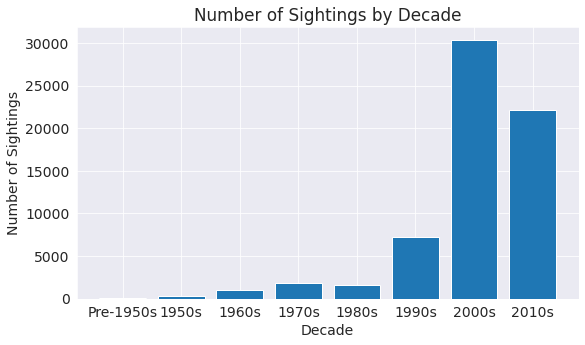

In [43]:
plt.bar(ufo_decades_df['decade'], ufo_decades_df['total_sightings'])
plt.xlabel('Decade')
plt.ylabel('Number of Sightings')
plt.title('Number of Sightings by Decade')

### ➢ Labeling the decade in addition to the year will be useful for future exploration, so I will add a decade column to the original dataframe, ufo_df

#### ➾ Taking the year of each report and reducing it to the decade it belongs to, so any date between the years 1970-1979 will be labeled as 1970 in a new "decade" column.

In [44]:
ufo_df['decade'] = ufo_df['year'] // 10 * 10


#### ➾ Taking the decade each sighting belongs to and turning it into a string that lables the decade, for example 1960 becomes 1960s.

In [45]:
ufo_df['decade'] = ufo_df['decade'].map(lambda x: str(x) + 's') 
    

In [194]:
ufo_df.head(2)

,city,state,country,shape,duration (seconds),comments,latitude,longitude,year,month,...,time,duration(minutes),duration_category,region,decade,military_sighting,entire_date,month_day,day_of_week,moon_phase_name
0,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.8830556,-97.941111,1949,10,...,20:30:00,45.000000,long,West South Central,1940s,False,1949-10-10,10-10,Monday,Waning Gibbous
1,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.9783333,-96.645833,1956,10,...,21:00:00,0.333333,short,West South Central,1950s,False,1956-10-10,10-10,Wednesday,Waxing Crescent


## ☆  UFO Sighting Counts by Region and Decade

### ➢ Now the original dataset has the region column added as well as a decade column, making it easier to sift through all the data in a more meaningful way.

In [47]:
ufo_year_region_df = ufo_df.groupby(['region', 'decade']).size().reset_index(name='count')


In [48]:
ufo_year_region_df.head(5)

,region,decade,count
0,East North Central,1920s,2
1,East North Central,1940s,8
2,East North Central,1950s,54
3,East North Central,1960s,162
4,East North Central,1970s,287


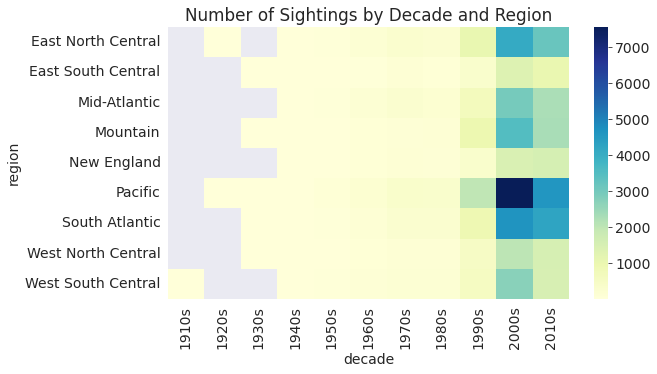

In [49]:

plt.title('Number of Sightings by Decade and Region')
sns.heatmap(ufo_year_region_df.pivot('region', 'decade', 'count'), cmap='YlGnBu');


#### ➾ Because much of the UFO activity has been reported in the later decades of the 20th century and into the 21st century, perhaps it makes sense to explore within that period of time more and not pay as much attention to the earlier decades.

## ☆  What are the top 10 states with the most reported UFO activity?

### ➢ Below I have made a small dataframe of the top ten states in the US for sightings and the count of sightings over the period for which reports have been kept.

In [195]:
ufo_state_df = ufo_df.groupby('state').size().reset_index(name='count')
ufo_state_df = ufo_state_df.sort_values('count', ascending=False).head(10)


### ➢ Let's look at a comparison of these top ten states as a lovely and colorful bar graph!

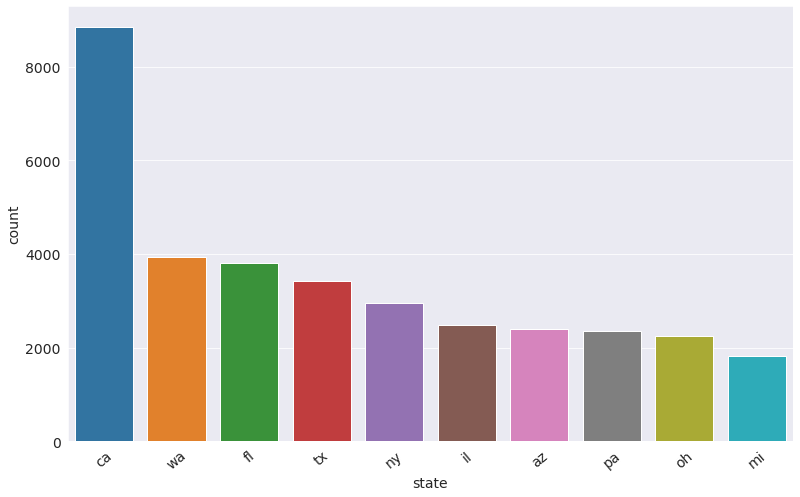

In [51]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x = 'state', y = 'count',data = ufo_state_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40);

### ➢ California is apparently VERY popular with the ETs! Or Californians are far more likely to report what they see!

## ☆  Let's look at the ten top states for UFO sightings compared to one another over the decades.

In [151]:
# Getting counts of sightings in the top ten states for sightings 
# over the decades.

california_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'ca']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'ca']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'ca']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'ca']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'ca']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'ca']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'ca']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'ca'])
}
washington_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'wa']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'wa']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'wa']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'wa']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'wa']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'wa']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'wa']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'wa'])
}
texas_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'tx']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'tx']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'tx']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'tx']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'tx']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'tx']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'tx']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'tx'])
}
florida_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'fl']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'fl']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'fl']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'fl']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'fl']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'fl']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'fl']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'fl'])
}
new_york_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'ny']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'ny']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'ny']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'ny']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'ny']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'ny']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'ny']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'ny'])
}
arizona_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'az']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'az']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'az']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'az']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'az']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'az']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'az']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'az'])
}
illinois_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'il']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'il']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'il']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'il']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'il']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'il']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'il']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'il'])
}
pennsylvania_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'pa']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'pa']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'pa']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'pa']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'pa']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'pa']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'pa']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'pa'])
}
ohio_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'oh']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'oh']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'oh']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'oh']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'oh']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'oh']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'oh']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'oh'])
}
michigan_counts = {
    'pre1950s': len(ufo_pre1950s_df[ufo_pre1950s_df['state'] == 'mi']),
    '1950s': len(ufo_1950s_df[ufo_1950s_df['state'] == 'mi']),
    '1960s': len(ufo_1960s_df[ufo_1960s_df['state'] == 'mi']),
    '1970s': len(ufo_1970s_df[ufo_1970s_df['state'] == 'mi']),
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'mi']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'mi']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'mi']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'mi'])
}


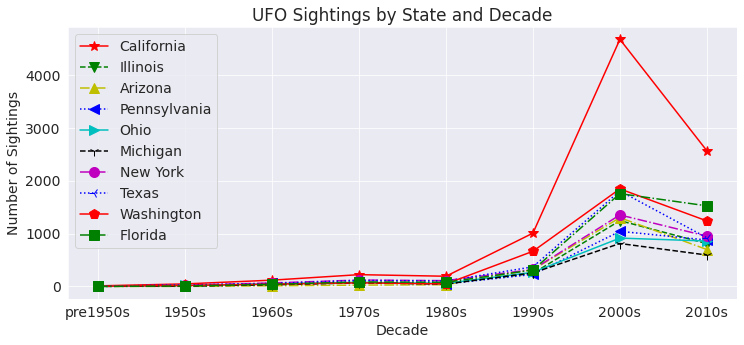

In [191]:
# plot a line graph for each of the states' counts together 
# on one graph
plt.figure(figsize=(12, 5))
plt.plot(list(california_counts.keys()), list(california_counts.values()), '*-r', label='California')
plt.plot(list(illinois_counts.keys()), list(illinois_counts.values()), 'v--g', label='Illinois')
plt.plot(list(arizona_counts.keys()), list(arizona_counts.values()), '^-.y', label='Arizona')
plt.plot(list(pennsylvania_counts.keys()), list(pennsylvania_counts.values()), '<:b',label='Pennsylvania')
plt.plot(list(ohio_counts.keys()), list(ohio_counts.values()), '>-c',label='Ohio')
plt.plot(list(michigan_counts.keys()), list(michigan_counts.values()), '1--k',label='Michigan')
plt.plot(list(new_york_counts.keys()), list(new_york_counts.values()), 'o-.m',label='New York')
plt.plot(list(texas_counts.keys()), list(texas_counts.values()), '3:b',label='Texas')
plt.plot(list(washington_counts.keys()), list(washington_counts.values()), 'p-r',label='Washington')
plt.plot(list(florida_counts.keys()), list(florida_counts.values()), 's-.g',label='Florida')

plt.xlabel('Decade')
plt.ylabel('Number of Sightings')
plt.legend()
plt.title('UFO Sightings by State and Decade')
plt.show()

### ➢ Again, it is clear that most of the activity reported to NUFORC occurred from the 1980s and later, so perhaps we can get a better view if we plot from 1980 to the most current numbers:

In [55]:
# Getting counts of sightings in the top ten states for sightings 
# over the decades only 1980s forward.

california_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'ca']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'ca']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'ca']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'ca'])
}
washington_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'wa']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'wa']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'wa']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'wa'])
}
texas_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'tx']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'tx']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'tx']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'tx'])
}
florida_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'fl']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'fl']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'fl']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'fl'])
}
new_york_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'ny']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'ny']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'ny']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'ny'])
}
arizona_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'az']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'az']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'az']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'az'])
}
illinois_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'il']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'il']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'il']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'il'])
}
pennsylvania_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'pa']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'pa']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'pa']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'pa'])
}
ohio_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'oh']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'oh']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'oh']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'oh'])
}
michigan_counts_later = {
    '1980s': len(ufo_1980s_df[ufo_1980s_df['state'] == 'mi']),
    '1990s': len(ufo_1990s_df[ufo_1990s_df['state'] == 'mi']),
    '2000s': len(ufo_2000s_df[ufo_2000s_df['state'] == 'mi']),
    '2010s': len(ufo_2010s_df[ufo_2010s_df['state'] == 'mi'])
}


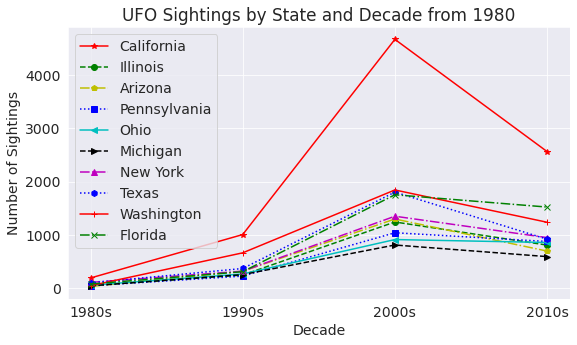

In [56]:
# plot a line graph for each of the states' counts together 
# on one graph from 1980 forward

plt.plot(list(california_counts_later.keys()), list(california_counts_later.values()), '*-r', label='California')
plt.plot(list(illinois_counts_later.keys()), list(illinois_counts_later.values()), 'o--g', label='Illinois')
plt.plot(list(arizona_counts_later.keys()), list(arizona_counts_later.values()), 'p-.y', label='Arizona')
plt.plot(list(pennsylvania_counts_later.keys()), list(pennsylvania_counts_later.values()), 's:b',label='Pennsylvania')
plt.plot(list(ohio_counts_later.keys()), list(ohio_counts_later.values()), '<-c',label='Ohio')
plt.plot(list(michigan_counts_later.keys()), list(michigan_counts_later.values()), '>--k',label='Michigan')
plt.plot(list(new_york_counts_later.keys()), list(new_york_counts_later.values()), '^-.m',label='New York')
plt.plot(list(texas_counts_later.keys()), list(texas_counts_later.values()), 'h:b',label='Texas')
plt.plot(list(washington_counts_later.keys()), list(washington_counts_later.values()), '+-r',label='Washington')
plt.plot(list(florida_counts_later.keys()), list(florida_counts_later.values()), 'x-.g',label='Florida')

plt.xlabel('Decade')
plt.ylabel('Number of Sightings')
plt.legend()
plt.title('UFO Sightings by State and Decade from 1980')
plt.show()

### ➢  Now we are able to get a slightly more detailed view for comparison between the top 10 states for sightings. California definitely is a winner!

## ☆  Let's look at shapes / types of UFO sightings compared to one another over the decades.

### ➢ Create a dataframe with the decades as compiled above, the count of their sightings, and the top 4 most common types of UFOs witnessed during each decade.

In [57]:
ufo_decades_types_df = pd.DataFrame(
    {'decade': ['Pre-1950s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
     'total_sightings': [len(ufo_pre1950s_df), len(ufo_1950s_df), len(ufo_1960s_df), len(ufo_1970s_df),
                         len(ufo_1980s_df), len(ufo_1990s_df), len(ufo_2000s_df), len(ufo_2010s_df)],
     'top_shape_1': [ufo_pre1950s_df['shape'].value_counts().index[0],
                            ufo_1950s_df['shape'].value_counts().index[0], ufo_1960s_df['shape'].value_counts().index[0],
                            ufo_1970s_df['shape'].value_counts().index[0], ufo_1980s_df['shape'].value_counts().index[0],
                            ufo_1990s_df['shape'].value_counts().index[0], ufo_2000s_df['shape'].value_counts().index[0],
                            ufo_2010s_df['shape'].value_counts().index[0]],
     'top_shape_2': [ufo_pre1950s_df['shape'].value_counts().index[1],
                            ufo_1950s_df['shape'].value_counts().index[1], ufo_1960s_df['shape'].value_counts().index[1],
                            ufo_1970s_df['shape'].value_counts().index[1], ufo_1980s_df['shape'].value_counts().index[1],
                            ufo_1990s_df['shape'].value_counts().index[1], ufo_2000s_df['shape'].value_counts().index[1],
                            ufo_2010s_df['shape'].value_counts().index[1]],
     'top_shape_3': [ufo_pre1950s_df['shape'].value_counts().index[2],
                            ufo_1950s_df['shape'].value_counts().index[2], ufo_1960s_df['shape'].value_counts().index[2],
                            ufo_1970s_df['shape'].value_counts().index[2], ufo_1980s_df['shape'].value_counts().index[2],
                            ufo_1990s_df['shape'].value_counts().index[2], ufo_2000s_df['shape'].value_counts().index[2],
                            ufo_2010s_df['shape'].value_counts().index[2]],
     'top_shape_4': [ufo_pre1950s_df['shape'].value_counts().index[3],
                            ufo_1950s_df['shape'].value_counts().index[3], ufo_1960s_df['shape'].value_counts().index[3],
                            ufo_1970s_df['shape'].value_counts().index[3], ufo_1980s_df['shape'].value_counts().index[3],
                            ufo_1990s_df['shape'].value_counts().index[3], ufo_2000s_df['shape'].value_counts().index[3],
                            ufo_2010s_df['shape'].value_counts().index[3]]})


In [58]:
ufo_decades_types_df

,decade,total_sightings,top_shape_1,top_shape_2,top_shape_3,top_shape_4
0,Pre-1950s,86,disk,oval,cigar,circle
1,1950s,335,disk,light,circle,cigar
2,1960s,1037,disk,light,circle,sphere
3,1970s,1824,disk,light,circle,triangle
4,1980s,1590,disk,triangle,light,other
5,1990s,7265,light,triangle,other,fireball
6,2000s,30343,light,triangle,circle,unknown
7,2010s,22147,light,fireball,circle,triangle


### ➢ Looking at the data above, it is difficult to see how useful charting is really possible. <br>
 ⭒ But if we take the four most common shapes among those and plot them, perhaps they will show us something interesting. The shapes: "disk", "light", "triangle", and "circle" seem to be the most common among these.

In [59]:

shape_counts = {
    'pre1950s': {
        'disk': len(ufo_pre1950s_df[ufo_pre1950s_df['shape'] == 'disk']),
        'light': len(ufo_pre1950s_df[ufo_pre1950s_df['shape'] == 'light']),
        'triangle': len(ufo_pre1950s_df[ufo_pre1950s_df['shape'] == 'triangle']),
        'circle': len(ufo_pre1950s_df[ufo_pre1950s_df['shape'] == 'circle'])
    },  
    '1950s': {
        'disk': len(ufo_1950s_df[ufo_1950s_df['shape'] == 'disk']), 
        'light': len(ufo_1950s_df[ufo_1950s_df['shape'] == 'light']),
        'triangle': len(ufo_1950s_df[ufo_1950s_df['shape'] == 'triangle']),
        'circle': len(ufo_1950s_df[ufo_1950s_df['shape'] == 'circle'])
    },
    '1960s': {
        'disk': len(ufo_1960s_df[ufo_1960s_df['shape'] == 'disk']),
        'light': len(ufo_1960s_df[ufo_1960s_df['shape'] == 'light']),
        'triangle': len(ufo_1960s_df[ufo_1960s_df['shape'] == 'triangle']),
        'circle': len(ufo_1960s_df[ufo_1960s_df['shape'] == 'circle'])
    },
    '1970s': {
        'disk': len(ufo_1970s_df[ufo_1970s_df['shape'] == 'disk']),
        'light': len(ufo_1970s_df[ufo_1970s_df['shape'] == 'light']),
        'triangle': len(ufo_1970s_df[ufo_1970s_df['shape'] == 'triangle']),
        'circle': len(ufo_1970s_df[ufo_1970s_df['shape'] == 'circle'])
    },
    '1980s': {
        'disk': len(ufo_1980s_df[ufo_1980s_df['shape'] == 'disk']),
        'light': len(ufo_1980s_df[ufo_1980s_df['shape'] == 'light']),
        'triangle': len(ufo_1980s_df[ufo_1980s_df['shape'] == 'triangle']),
        'circle': len(ufo_1980s_df[ufo_1980s_df['shape'] == 'circle'])
    },
    '1990s': {
        'disk': len(ufo_1990s_df[ufo_1990s_df['shape'] == 'disk']),
        'light': len(ufo_1990s_df[ufo_1990s_df['shape'] == 'light']),
        'triangle': len(ufo_1990s_df[ufo_1990s_df['shape'] == 'triangle']),
        'circle': len(ufo_1990s_df[ufo_1990s_df['shape'] == 'circle'])
    },
    '2000s': {
        'disk': len(ufo_2000s_df[ufo_2000s_df['shape'] == 'disk']),
        'light': len(ufo_2000s_df[ufo_2000s_df['shape'] == 'light']),
        'triangle': len(ufo_2000s_df[ufo_2000s_df['shape'] == 'triangle']),
        'circle': len(ufo_2000s_df[ufo_2000s_df['shape'] == 'circle'])
    },
    '2010s': {
        'disk': len(ufo_2010s_df[ufo_2010s_df['shape'] == 'disk']),
        'light': len(ufo_2010s_df[ufo_2010s_df['shape'] == 'light']),
        'triangle': len(ufo_2010s_df[ufo_2010s_df['shape'] == 'triangle']),
        'circle': len(ufo_2010s_df[ufo_2010s_df['shape'] == 'circle'])
    }
}



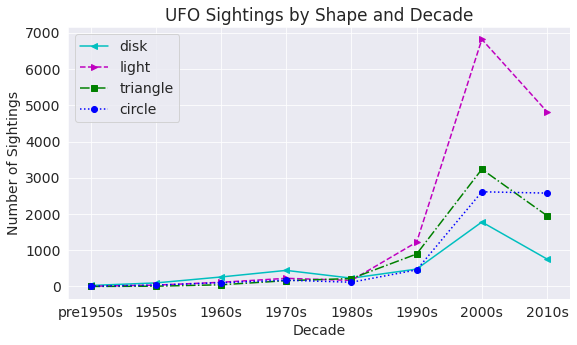

In [60]:
decades = ['pre1950s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
disk_counts = [shape_counts[decade]['disk'] for decade in decades]
light_counts = [shape_counts[decade]['light'] for decade in decades]
triangle_counts = [shape_counts[decade]['triangle'] for decade in decades]
circle_counts = [shape_counts[decade]['circle'] for decade in decades]

plt.plot(decades, disk_counts, '<-c', label='disk')
plt.plot(decades, light_counts, '>--m', label='light')
plt.plot(decades, triangle_counts, 's-.g', label='triangle')
plt.plot(decades, circle_counts, 'o:b', label='circle')
plt.legend()
plt.xlabel('Decade')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Shape and Decade')
plt.show()

### ➢ Now, we get a clearer image of the frequency of the top four UFO shapes and the frequency of their sightings. 

It seems that UFOs described merely as "light" took over strongly beginning around the 1980s. And it is easy to surmise that the abundance of satellites orbiting Earth may have caused a spike like this. This is probably a large reason why NUFORC now requests that any reports of strings of lights not be made anymore. The following is from their site:
<br><br>
source: https://nuforc.org/file-a-report/<br><br>
<b><i>Starlink Satellites - Please do not Report</i></b><br>
<i>NUFORC continues to receive a large volume of calls over its Hotline, and large numbers of written reports, about the “Starlink” satellite clusters.  If you see a line of lights in the sky similar to those shown at right it is probably Starlink, and not UFOs, so please do not report them. </i>  

In [61]:
# Creating a csv version of my main dataframe thus far to 
# make it easier to work with during the process of completing 
# this assignment

ufo_df.to_csv('ufo_download_df.csv', index=None)

In [62]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/ufos-this-will-be-fun" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/evanmarie/ufos-this-will-be-fun


'https://jovian.ai/evanmarie/ufos-this-will-be-fun'

## ☆ Asking and Answering Questions ☆




### ☆ Q1: Are there really more UFO sightings near military bases?
It is something you have heard if you have ever listened to many UFO enthusiasts discuss the topic. There are also numerous military officials and servicemen and women who have witnessed unexplainable occurrences and gone on to tell their stories. So let's look at our data and see what it says about this topic:

### ➢ Installing and importing additional libraries 

Because much of the UFO data becomes much more interesting when we throw in the geolocation dimension, we will need to import a few more libraries and tools to work with our data:

In [64]:
!pip install Pypi

  Created wheel for Pypi: filename=pypi-2.1-py3-none-any.whl size=1354 sha256=eba599e60ae5a7b2800fc3b312d06d30da5d36519d84915a5b3dfd6662f4b388
  Stored in directory: /home/jovyan/.cache/pip/wheels/de/52/e9/d760a5e0e4b77d30df3da4e71e10451443393d77c2b3d0ed8c
Successfully built Pypi


In [65]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 16.6 MB 4.6 MB/s eta 0:00:01    |████████████▌                   | 6.5 MB 4.6 MB/s eta 0:00:03     |██████████████████▏             | 9.5 MB 4.6 MB/s eta 0:00:02     |███████████████████████         | 11.9 MB 4.6 MB/s eta 0:00:02MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 79.9 MB/s eta 0:00:01     |███████▌                        | 481 kB 79.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 18.6 MB/s eta 0:00:01


In [66]:
import geopandas as gpd
import shapely.geometry

### ➢ I am utilizing GeoPandas for my geoplotting.

For more information about GeoPandas, visit: https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html<br>
This is where I found a great deal of guidance for this project.
<br><br>
Some of the questions I will be delving into concern the supposed tendency for high numbers of UFO sightings near various military installations and nuclear facilities in the US. So I before getting to the questions on the subject, I will set up some dataframes that I will create myself with the locations of such sites. I will start here with the 12 United States joint military bases located within the United States. 

In [67]:
# Import CSV file I made of the US joint military bases
bases_dataset_url = 'https://www.kaggle.com/datasets/evanmariecarr/basescsv/download?datasetVersionNumber=1'

od.download(bases_dataset_url, force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: evanmariecarr
Your Kaggle Key: ········


100%|██████████| 578/578 [00:00<00:00, 972kB/s]

In [94]:
bases_df = pd.read_csv("./basescsv/bases.csv", low_memory=False)


In [95]:
joint_bases_gdf = gpd.GeoDataFrame(
    bases_df, geometry=gpd.points_from_xy(bases_df.longitude, 
                                                      bases_df.latitude))



### ➢ Here we see the first five bases in our new dataframe

In [96]:
joint_bases_gdf.head(5)

,base,city,state,latitude,longitude,geometry
0,The Pentagon,Arlington,va,38.870833,-77.055000,POINT (-77.05500 38.87083)
1,Elmendorf–Richardson,Anchorage,ak,61.251389,-149.806389,POINT (-149.80639 61.25139)
2,Pearl Harbor,Honolulu,hi,21.367900,-157.977100,POINT (-157.97710 21.36790)
3,McGuire–Dix–Lakehurst,Trenton,nj,40.015556,-74.591667,POINT (-74.59167 40.01556)
4,Charleston,North Charleston,sc,32.898611,-80.040556,POINT (-80.04056 32.89861)


### ➢ With GeoPandas, we can plot these on a map of North America.

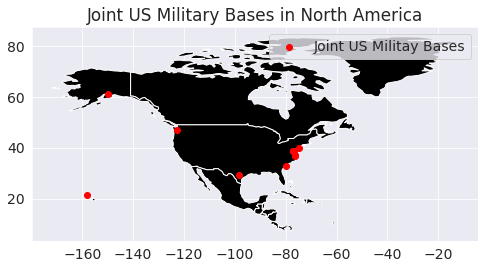

In [97]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Setting the map location to center on North America
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='white')

# Plotting our joint military bases on the map as a GeoDataFrame.
joint_bases_gdf.plot(ax=ax, color='red')
plt.rcParams['figure.figsize'] = [8, 8]
plt.title('Joint US Military Bases in North America')
plt.legend(['Joint US Militay Bases'])
plt.show()


### ➢  Let's compare the joint bases map with a map of all of our sightings!

In [98]:
# Create the dataframe from which to plot the GeoDataFrame

ufo_longitude_latitude_df = ufo_df[['month', 'day', 'year',
                                    'time', 'latitude', 
                                    'longitude']].copy()


ufo_longitude_latitude_gdf = gpd.GeoDataFrame(
    ufo_longitude_latitude_df, geometry=gpd.points_from_xy(ufo_longitude_latitude_df.longitude, 
                                                      ufo_longitude_latitude_df.latitude))



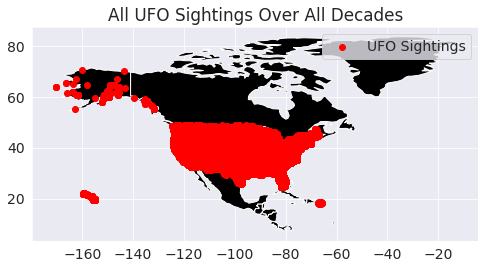

In [99]:
# Plot all of our sightings onto the same map of North America

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Setting the map location to center on North America
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='white')

# Plotting all of our sightings.
ufo_longitude_latitude_gdf.plot(ax=ax, color='red')

plt.title('All UFO Sightings Over All Decades')
plt.legend(['UFO Sightings'])
plt.show()

### ➾ Oh my! That's a lot of sightings! Looks like we need to drill down!

In [100]:
# To compare coordinates of military bases and UFO sightings:
# take difference in latitudes, square it
# take difference in longitude, square it
# add the two squares together
# take square root of that sum

def distance_from_base(row, base):
    lat_diff = row['latitude'] - base['latitude']
    lon_diff = row['longitude'] - base['longitude']
    return np.sqrt(lat_diff**2 + lon_diff**2)
                

###  ➾ Sightings in states with military bases
Let's narrow down the number of sightings on our map to just sightings occurring in the states where there are US joint military bases.

In [101]:
# Create a list of all the states with joint military bases
states_with_bases = bases_df['state'].unique()


# Create a dataframe with all the sightings in the same state as a military base
sightings_near_bases_df = ufo_df[ufo_df['state'].isin(states_with_bases)]

total_sightings_near_bases = len(sightings_near_bases_df)

print("There are {:,} sightings near military bases.".format(total_sightings_near_bases))

There are 11,424 sightings near military bases.


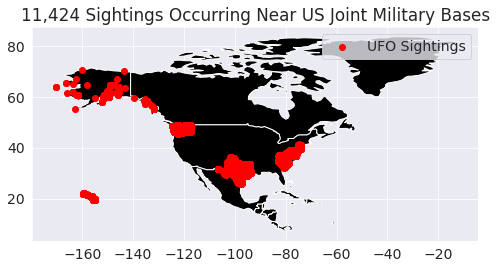

In [102]:
# Create the dataframe from which to plot the GeoDataFrame

sightings_near_bases_gdf = gpd.GeoDataFrame(
    sightings_near_bases_df, geometry=gpd.points_from_xy(sightings_near_bases_df.longitude, 
                                                      sightings_near_bases_df.latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Setting the map location to center on North America
ax = world[world.continent == 'North America'].plot(
    color='black', edgecolor='white')

# Plotting all of our sightings.
sightings_near_bases_gdf.plot(ax=ax, color='red')

plt.title('11,424 Sightings Occurring Near US Joint Military Bases')
plt.legend(['UFO Sightings'])
plt.show()


### ➾ Of total sightings, what percent occur near military bases?

In [103]:
percentage_military = (len(sightings_near_bases_df) / len(ufo_df)) * 100

print("The {:,} sightings near military bases account for {:,.2f}% \n of all sightings.".format(total_sightings_near_bases, percentage_military))


The 11,424 sightings near military bases account for 17.68% 
 of all sightings.


### ☆ Q2: Are there any other connections to the military?

Another fairly confirming detail of the validity of UFO sightings is the sheer number of officials in the military and other individuals associated with military or law enforcement who have made reports of sightings either while performing their professional duties or otherwise. So let's take a look at the comments and descriptions of sightings for individuals who fall into this category.

#### First, I will create a list of words that would be often be found in a report given by a military or law enforcement official. I will call it 'military_words'. Then I will create a dataframe of only sightings that contain a word from 'military_words' within the comments/description of the sighting.

In [104]:
military_words = ['military', 'army', 'marines', 'base', 'serviceman', 'air force', 'commander', 'officer', 'naval',
                  'soldier', 'navy', 'pilot', 'aircraft', 'military airplane', 'military plane', 'military aircraft', 'coast guard',
                  'official', 'officer', 'officers', 'officials', 'military aircraft', 'policeman', 'navyman',  
                  'police', 'police car', 'law', 'enforcement', 'official']

In [105]:
# search through comments in the ufo_df dataframe for the words 
# from military_words
ufo_df['military_sighting'] = 0
ufo_df['military_sighting'] = ufo_df['comments'].str.contains('|'.join(military_words), case=False)


In [106]:
# create a new dataframe with only the military sightings
military_sightings_df = ufo_df[ufo_df['military_sighting'] == True]
military_sightings_count = military_sightings_df.count()

#### Run the next cell, and you can see the first strings of words from the first comments that come up containing at least one of the words from 'military_words'. You can also see that there are a total of 2,041 sightings marked as military sightings in the new military_words dataframe.

In [108]:
# print entire_date, city, state, and comments for the military sightings
print(military_sightings_df[['month', 'day', 'year', 'city', 'state', 'comments']].head())
print('\n')
print(f"There are {military_sightings_count[0]} military sightings by in the ufo_df dataframe.")


    month  day  year              city state  \
4      10   10  1960           kaneohe    hi   
22     10   10  1975  north charleston    sc   
26     10   10  1977        louisville    ky   
54     10   10  1992       weatherford    tx   
59     10   10  1994       burnt hills    ny   

                                             comments  
4   AS a Marine 1st Lt. flying an FJ4B fighter/att...  
22  Several Flashing UFO lights over Charleston Na...  
26  HBCCUFO CANADIAN REPORT:  Pilot Sighting Of Un...  
54  Black or dark grey.  Too big&#44 too low&#44 t...  
59  Giant rectangular craft (resembling an upside-...  


There are 2041 military sightings by in the ufo_df dataframe.


### ➢ Search the sightings descriptions for yourself!



In [135]:
# Create a search based on user input to find a word or words in the comments of ufo_df
# show the full comment if the word is found
def search_comments():
    search = input("Enter a word or words to search for in the comments: ")
    search_df = ufo_df[ufo_df['comments'].str.contains(search, case=False, na=False)]
    if search_df.empty:
        print("No results found.")
    else:
        print(search_df[['entire_date', 'city', 'state', 'comments']])
        print(f"There are {search_df.count()[0]} results found.")
        
search_comments()

Enter a word or words to search for in the comments: cheeseburger
No results found.


In [137]:
# View just the comments of a sighting by searching for its index number
def view_comments():
    index = int(input("Enter the index number of the sighting to view its comments: "))
    # if the index number does not exist, print an error message
    if index > ufo_df.index.max():
        print("Index number does not exist.")
    else:
        print(ufo_df['comments'][index])


# Reindex ufo_df with new index numbers and no gaps between
ufo_df = ufo_df.reset_index(drop=True)

view_comments()

Enter the index number of the sighting to view its comments: 123
Intermittant streak by moon&#44 not seen on photo taken 10 seconds earlier.


#### Now, let's look at the lengths of sightings marked as military or law enforcement related. Many reports in the media mention that these types of encounters tend to be longer in duration, since many of them are witnessed by pilots and officials serving in capacities that, it seems, tends to spark lingering curiosity among those ETs!

In [109]:
# How many military sightings are labeled as 'long" duration category?
military_short = military_sightings_df[military_sightings_df['duration_category'] == 'short']
military_medium = military_sightings_df[military_sightings_df['duration_category'] == 'medium']
military_long = military_sightings_df[military_sightings_df['duration_category'] == 'long']
military_short_count = military_short.count()
military_medium_count = military_medium.count()
military_long_count = military_long.count()
print(f"There are {military_short_count[0]} military sightings that are labeled as 'short', less than 1 minute.")
print(f"There are {military_medium_count[0]} military sightings that are labeled as 'medium', between 1 and 5 minutes.")
print(f"There are {military_long_count[0]} military sightings that are labeled as 'long', more than 5 minutes.")

There are 528 military sightings that are labeled as 'short', less than 1 minute.
There are 823 military sightings that are labeled as 'medium', between 1 and 5 minutes.
There are 690 military sightings that are labeled as 'long', more than 5 minutes.


#### We can see here that most of the sightings in this category tend to be at least of medium duration and many are fall into the long duration category. Let's get a visual representation of this data:

### ➾ Now let's take these new duration category counts for the military sightings and see a histogram of duration, count, and the shape or type of UFO witnessed in each of the military or law enforcement sightings

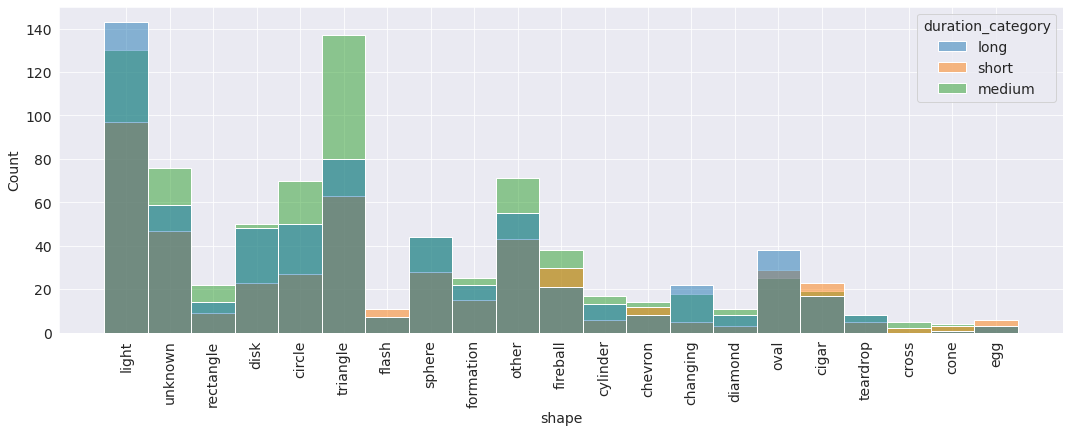

<Figure size 720x216 with 0 Axes>

In [185]:
ax = sns.histplot(x='shape', hue='duration_category', data=military_sightings_df)
ax.figure.set_size_inches(18, 6);
plt.xticks(rotation=90);
plt.figure(figsize=(10, 3));


#### Now, let's get a count of all of the words from 'military_words' found in the comments and then a count of just the top words found.

In [111]:
military_words_dict = {}
for word in military_words:
    military_words_dict[word] = ufo_df['comments'].str.contains(word, case=False).sum()

In [112]:
military_words_dict

{'military': 255,
 'army': 33,
 'marines': 0,
 'base': 218,
 'serviceman': 0,
 'air force': 87,
 'commander': 1,
 'officer': 70,
 'naval': 28,
 'soldier': 4,
 'navy': 37,
 'pilot': 88,
 'aircraft': 1136,
 'military airplane': 0,
 'military plane': 19,
 'military aircraft': 34,
 'coast guard': 2,
 'official': 6,
 'officers': 18,
 'officials': 0,
 'policeman': 2,
 'navyman': 0,
 'police': 120,
 'police car': 7,
 'law': 158,
 'enforcement': 11}

In [113]:
# Take the 7 most found military words and make another dictionary with them and their count
military_words_dict = {k: v for k, v in sorted(military_words_dict.items(), key=lambda item: item[1], reverse=True)}
military_words_dict = dict(list(military_words_dict.items())[0:7])

In [156]:
military_words_dict

{'military': 255,
 'base': 218,
 'law': 158,
 'police': 120,
 'pilot': 88,
 'air force': 87}

#### Because the word "aircraft" could be associated with the military but also very likely might not have been in the reports, we will ignore that word for now and just consider the 6 next most common military and law enforcement words found, keeping in mind that the reports mentioning a military aircraft most likely contain the word 'military' as well.

In [157]:
del military_words_dict['aircraft']

KeyError: 'aircraft'

In [ ]:
# Create a new dataframe of sightings whose comments contain any of 
# the words from military_words_dict unless the field is NaN

military_words_df = military_sightings_df[military_sightings_df['comments'].str.contains('|'.join(military_words_dict), case=False, na=False)]


### ➾ Let's look at a plot of the number of military sightings by year over the decades that we have available.

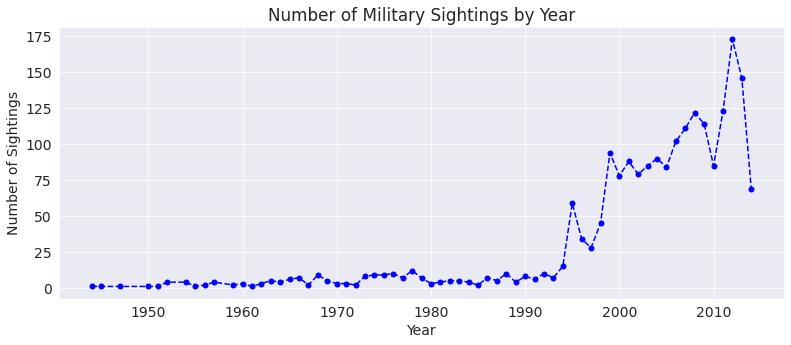

In [177]:
# plot a line graph of the number of military sightings by year
plt.figure(figsize=(13, 5))
fmt = '[marker][line][color]'  
plt.plot(military_sightings_df['year'].value_counts().sort_index(), '.--b')
plt.title("Number of Military Sightings by Year")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.show()


### ☆ Q3: Do more UFO sightings around days of celestial significance?
It would be interesting to see if there are significantly more than the average number of sightings on days around or on days of celestial significance on Earth. Let's have a look! (I am also throwing in New Years Day, because it seems significant somehow! Surely the ETs like to celebrate a new year on Earth along with us!)

In [118]:
# This is when we need to add back in that datetime column 
# we had before. At least now, it will be more uniformly rendered.

ufo_df['entire_date'] = pd.to_datetime(ufo_df[['year', 'month', 'day']])


### And the average sightings per day?
To compare we will need an average for the sightings per day. We will calculate that here:

In [119]:
# .numunique() returns the number of unique values in a column
total_unique_days = ufo_df['entire_date'].nunique()

# Now, let's average the number of sightings on any given day
overall_daily_average = len(ufo_df) / total_unique_days

print(f'The average daily number of sightings within the NUFORC datatset is {overall_daily_average:.2f} sightings on any given day within the dataset over the course of all the decades represented.')
      

The average daily number of sightings within the NUFORC datatset is 6.61 sightings on any given day within the dataset over the course of all the decades represented.


Now to get an average number of sightings for any given day of any year based on the dataset.

In [120]:
# Get the number of unique calendar days represented in the dataset
# It is most likely going to be 366, all 365 normal calendar days, 
# plus leap year, but we must be certain:

calendar_day_sightings = ufo_df['entire_date'].dt.date.value_counts()
ufo_df['month_day'] = ufo_df['entire_date'].dt.strftime('%m-%d')
total_month_days = len(ufo_df['month_day'].unique())

# total_month_days did, in fact, come to 366

calendar_daily_average = len(ufo_df) // 366

print(f'The approximate average number of sightings for any given calendar day is {calendar_daily_average}.')
      

The approximate average number of sightings for any given calendar day is 176.


#### Now let's compare the average to important celestial event on Earth. To do so, I am importing a small CSV file of event dates to make the comparison. I have also uploaded this file to Kaggle:

In [121]:
# Import CSV file I made of the US joint military bases
events_dataset_url = 'https://www.kaggle.com/datasets/evanmariecarr/datescsv/download?datasetVersionNumber=1'

od.download(events_dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: evanmariecarr
Your Kaggle Key: ········


100%|██████████| 271/271 [00:00<00:00, 369kB/s]

In [122]:
events_df = pd.read_csv("./datescsv/typical_dates.csv", low_memory=False)


In [123]:
for row in events_df.itertuples():
    # Get the number of sightings for that month and day
    sightings = len(ufo_df[(ufo_df['month'] == row.month) & (ufo_df['day'] == row.day)])
    # Update the sightings column in events_df
    events_df.at[row.Index, 'sightings'] = sightings
    

In [124]:
events_df.head(10)

,month,day,event,sightings
0,1,1,New Years Day,511.0
1,3,21,Spring equinox,125.0
2,6,21,Summer solstice,165.0
3,9,22,Fall equinox,229.0
4,12,21,Winter solstice,114.0


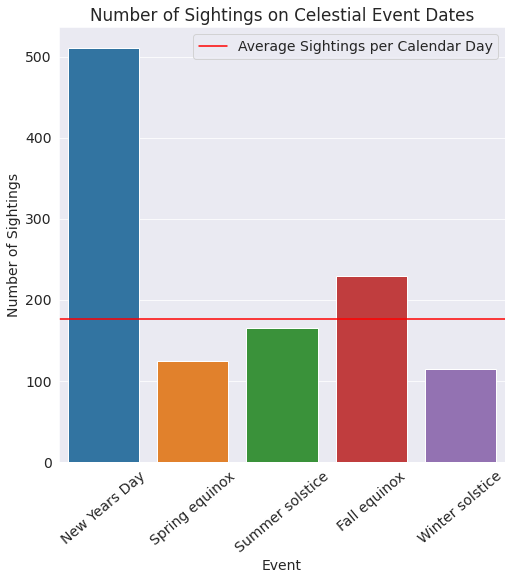

In [125]:
ax = sns.barplot(x='event', y='sightings', data=events_df)
plt.title("Number of Sightings on Celestial Event Dates")
plt.xlabel("Event")
plt.ylabel("Number of Sightings")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40);
plt.axhline(calendar_daily_average, color='red', label='Average Sightings per Calendar Day')
plt.legend()
plt.show()


### Interesting! So New Years Day and the fall equinox are the two days on our list that have higher than average sightings reported. I am guessing that fireworks on New Years Eve might account for some of that VERY high count. The fall equinox, however, that is another story.  But it is not an incredibly large margin by which it exceeds the average.

### ➢ Your turn! Run the cell below, and enter a month and a day and find out how many sightings appear in the NUFORC database for that day and the average number of sightings on that calendar day over the decades covered in the database. 

In [126]:
# Get a user's input for a month and day
month = input("Enter a month (MM): ")
day = input("Enter a day (DD): ")

# Get the average number of sightings for that month and day
average_sightings = len(ufo_df[ufo_df['month_day'] == f"{month}-{day}"]) / total_month_days

# Get the number of sightings for that month and day
sightings = len(ufo_df[(ufo_df['month'] == int(month)) & (ufo_df['day'] == int(day))])

# Print the results
print(f"There are {sightings} sightings on {month}/{day} and {average_sightings:.2f} sightings on average on {month}/{day}.")


Enter a month (MM): 05
Enter a day (DD): 31
There are 106 sightings on 05/31 and 0.29 sightings on average on 05/31.


### ➢ You should try July 4th (07 - 04)! That number MUST be due to fireworks! Or the ETs take a keen interest in the celebration of the independence of the United States of America. (I think I know which makes more rational sense.)

### ☆ Q4: Do sightings happen more often on certain days of the week?

In [127]:
# For this, we will need to add a column for the day of the week. 

ufo_df['day_of_week'] = ufo_df['entire_date'].dt.day_name()

In [128]:
# Find the average number of sightings on any given day of the week

average_sighting_weekdays = {
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,
    'Friday': 0,
    'Saturday': 0,
    'Sunday': 0
}

for day in ufo_df['day_of_week']:
    average_sighting_weekdays[day] += 1

for day in average_sighting_weekdays:
    average_sighting_weekdays[day] = average_sighting_weekdays[day] / total_unique_days

for day in average_sighting_weekdays:
    print(f"There are {average_sighting_weekdays[day]:.2f} sightings on average on any given {day}.")



There are 0.83 sightings on average on any given Monday.
There are 0.89 sightings on average on any given Tuesday.
There are 0.91 sightings on average on any given Wednesday.
There are 0.91 sightings on average on any given Thursday.
There are 0.96 sightings on average on any given Friday.
There are 1.16 sightings on average on any given Saturday.
There are 0.96 sightings on average on any given Sunday.


### ➢ Now, let's compare all of the days of the week and their percentages of the sightings.

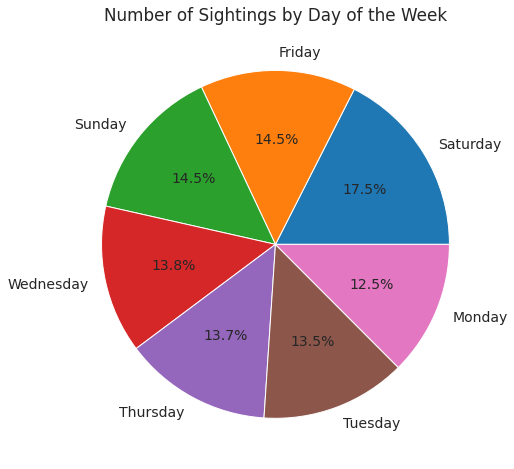

In [129]:
plt.pie(ufo_df['day_of_week'].value_counts(), labels=ufo_df['day_of_week'].value_counts().index, autopct='%1.1f%%')
plt.title("Number of Sightings by Day of the Week")
plt.show()


### ➢  That is UNBELIEVABLY even! I thought the weekend would definitely have a higher margin from the weekdays than this. But Fridays are barely 1% above the weekdays, and Saturday is only 4% higher. It looks like people have their eyes on the skies all week long!


### ☆ Q5: Do sightings fluctuate with the phase of the moon?

I have referenced where I found the following function for calculating the phase of the moon for any given date. Please feel free to use this set of functions and reference the author. It is a FANTASTIC function. I tried MANY different libraries and functions. And they were incredibly slow and tedious. Then in desperation, I went to find out how other people effectively performed such operations. I am so grateful to this author for his work!

In [130]:
"""
moonphase.py - Calculate Lunar Phase
Author: Sean B. Palmer, inamidst.com
Cf. http://en.wikipedia.org/wiki/Lunar_phase#Lunar_phase_calculation
"""

import math, decimal, datetime

dec = decimal.Decimal


def position(now=None):
    if now is None:
        now = datetime.datetime.now()

    diff = now - datetime.datetime(2001, 1, 1)
    days = dec(diff.days) + (dec(diff.seconds) / dec(86400))
    lunations = dec("0.20439731") + (days * dec("0.03386319269"))

    return lunations % dec(1)


def phase(pos):
    index = (pos * dec(8)) + dec("0.5")
    index = math.floor(index)
    return {
        0: "New Moon",
        1: "Waxing Crescent",
        2: "First Quarter",
        3: "Waxing Gibbous",
        4: "Full Moon",
        5: "Waning Gibbous",
        6: "Last Quarter",
        7: "Waning Crescent"
    }[int(index) & 7]


def main():
    pos = position()
    phasename = phase(pos)

    roundedpos = round(float(pos), 3)
    print("%s (%s)" % (phasename, roundedpos))


if __name__ == "__main__":
    main()


Full Moon (0.562)


### ➢  The code in the next cell will use the above function to add a column with the phase of the moon for each sighting.

In [131]:
ufo_df['moon_phase_name'] = 0

ufo_df['moon_phase_name'] = ufo_df['entire_date'].apply(lambda x: phase(position(x)))


### ➢  Let's look at the distribution of sightings and what the moon phases are for each

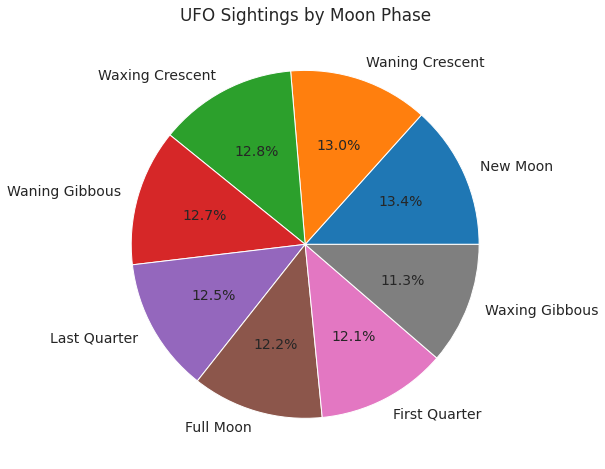

In [132]:
plt.pie(ufo_df['moon_phase_name'].value_counts(), labels=ufo_df['moon_phase_name'].value_counts().index, autopct='%1.1f%%')
plt.title('UFO Sightings by Moon Phase')
plt.show()


Let us save and upload our work to Jovian before continuing.

In [133]:
import jovian

In [134]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "evanmarie/ufos-this-will-be-fun" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/evanmarie/ufos-this-will-be-fun


'https://jovian.ai/evanmarie/ufos-this-will-be-fun'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

I have been fascinated by the unexplained my entire life. So UFO sightings is inevitably a part of that fascination. When I saw this dataset existed, my mind was made up! And I really enjoyed working with the data and answering a fair number of questions myself just based on the raw data available. 

The only drawback, and possible regret, that I had over the course of this project was that I was unable to create some of the plots that I had wanted to work with due to the fact that so much of my data is not number-oriented. And so, for example, I could never find a good way to incorporate a scatterplot with this data. In the lecture, as I was learning about this all for the first time, the scatterplot was definitely one that I found most interesting. My data just did not end up being meaningfully displayable in that way. Other than that aspect, I found it overall very intriguing.

There are many more questions I would like to delve into with regards to this topic of UFO sightings. It could be interesting, for example, to make more comparisons between the different regions of the US. I also think it would be interesting to look into the number of sightings and if they increase around certain events, such as nuclear testing, etc. I have heard reports that suggest as much, but I have never seen the data to back them up.



> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()